Data Summary:
               Open          High           Low         Close     Adj Close  \
count  10409.000000  10409.000000  10409.000000  10409.000000  10409.000000   
mean      13.959910     14.111936     13.809163     13.966757     13.350337   
std       30.169244     30.514878     29.835055     30.191696     29.911132   
min        0.049665      0.049665      0.049107      0.049107      0.038384   
25%        0.281964      0.287946      0.274554      0.281250      0.234799   
50%        0.468750      0.477679      0.459821      0.468750      0.386853   
75%       14.217857     14.364286     14.043571     14.206071     12.188149   
max      182.630005    182.940002    179.119995    182.009995    181.778397   

             Volume  
count  1.040900e+04  
mean   3.321778e+08  
std    3.393344e+08  
min    0.000000e+00  
25%    1.247604e+08  
50%    2.199680e+08  
75%    4.126108e+08  
max    7.421641e+09  

Data Head:
                Open      High       Low     Close  Adj Close   

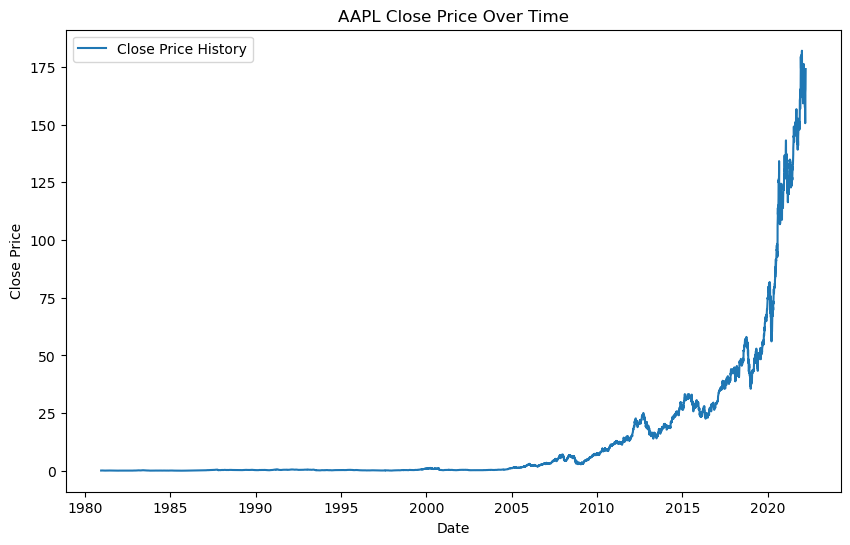

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - loss: 1.1499e-04 - val_loss: 7.8158e-04
Epoch 2/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 2.3906e-06 - val_loss: 0.0011
Epoch 3/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 2.1675e-06 - val_loss: 0.0020
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 2.2980e-06 - val_loss: 0.0013
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 2.6726e-06 - val_loss: 6.5121e-04
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 2.6189e-06 - val_loss: 7.5483e-04
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 3.0754e-06 - val_loss: 9.1956e-04
Epoch 8/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 1.8837e-06 - val_loss: 0.0012
Epoch 9/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 2.9820e-06 - val_loss: 9.7069e-04
Epoch 10/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 1.7995e-06 - val_loss: 6.9873e-04
Epoch 11/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 2.0748

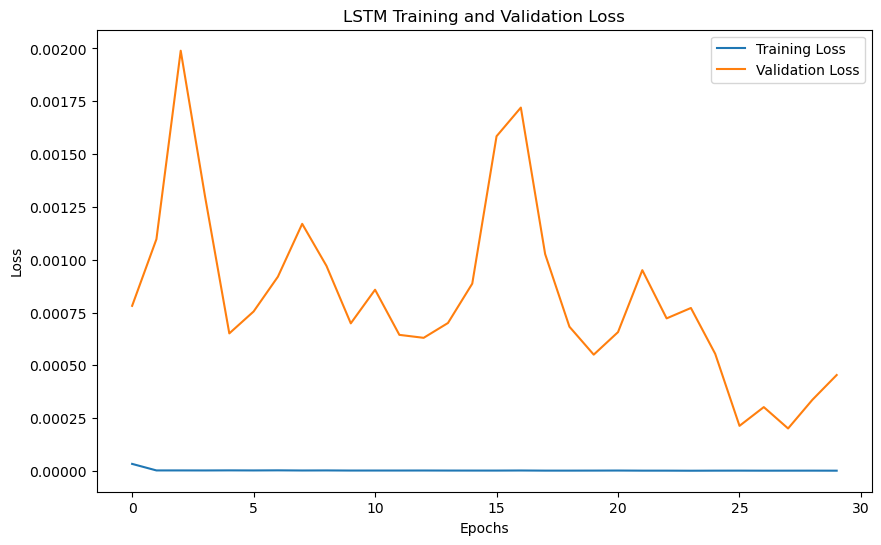

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


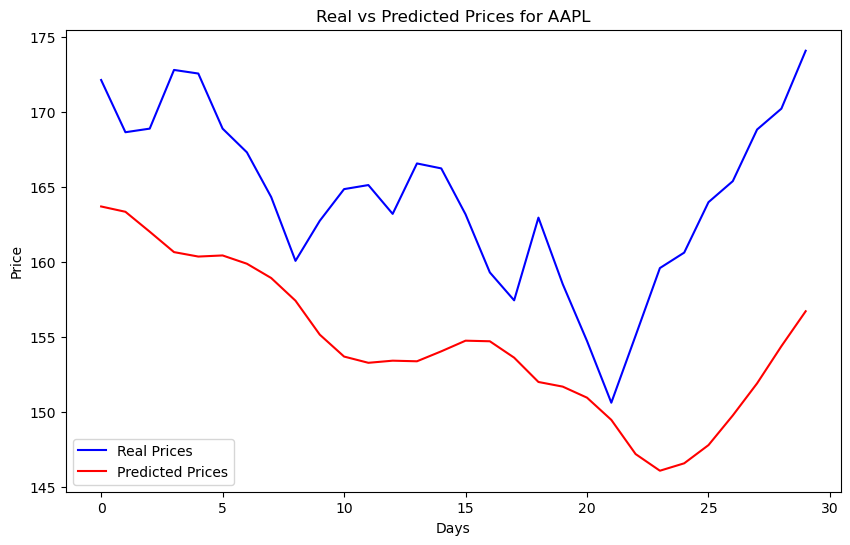

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file with AAPL stock data
df = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")

# Display initial analysis of the dataset
print("Data Summary:")
print(df.describe())
print("\nData Head:")
print(df.head())

# Plot the closing price to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price History')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("AAPL Close Price Over Time")
plt.legend()
plt.show()

# Preprocess data: Select 'Close' column for LSTM modeling and normalize
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create sequences with a lookback window of 60 days
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(df['Close'])):
    X.append(df['Close'].values[i-sequence_length:i])
    y.append(df['Close'].values[i])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=30, batch_size=64, validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training and Validation Loss")
plt.legend()
plt.show()

# Testing: Prepare test data using the last 60 days of the dataset
test_data = df['Close'].values[-(sequence_length + 30):]  # Use last 30 days for testing
X_test = []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict and inverse scale to get the original values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Get real values for comparison
real_data = df['Close'].values[-30:]  # Last 30 days actual close prices
real_data = scaler.inverse_transform(real_data.reshape(-1, 1))

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(real_data, label="Real Prices", color="blue")
plt.plot(predictions, label="Predicted Prices", color="red")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Real vs Predicted Prices for AAPL")
plt.legend()
plt.show()
